# Data from the experiments on PyroBuildS

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn
from utils import *

## Experiments on random configurations -- _randconfig_

### Build Time

Mean:
 Linux     -23.894312
Busybox    14.886917
Toybox     20.211054
dtype: float64
Min:
 Linux     -56.679979
Busybox     5.878313
Toybox     16.542056
dtype: float64
Max:
 Linux       1.782067
Busybox    20.410665
Toybox     24.429658
dtype: float64


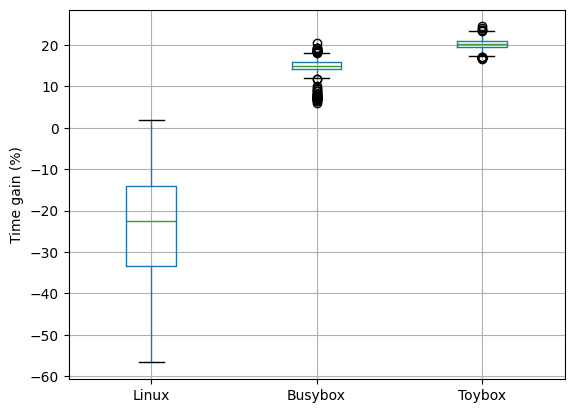

In [2]:
dfg_toybox_list = []
dfg_busybox_list = []
dfg_linux_list = []
config_type = "rand"
for j in range(1, 4):
    dfg_toybox_list.append(
        pandas.concat([pandas.read_csv(f"toybox/data/data-{config_type}-{i:02}-run{j}").drop(0) for i in range(1, 11)],
                          ignore_index=True))
    dfg_busybox_list.append(
        pandas.concat([pandas.read_csv(f"busybox/data/data-{config_type}-{i:02}-run{j}").drop(0) for i in range(1, 11)],
                          ignore_index=True))
    dfg_linux_list.append(
        pandas.concat([pandas.read_csv(f"linux/data/data-{config_type}-{i:02}-run{j}").drop(0) for i in range(1, 11)],
                          ignore_index=True))

dfg_toybox_mean = pandas.concat(dfg_toybox_list).groupby(level=0).mean()
dfg_busybox_mean = pandas.concat(dfg_busybox_list).groupby(level=0).mean()
dfg_linux_mean = pandas.concat(dfg_linux_list).groupby(level=0).mean()

dfg_toybox_mean["Gain"] = (dfg_toybox_mean["Clean"] - dfg_toybox_mean["Incremental"])/dfg_toybox_mean["Clean"]*100
dfg_busybox_mean["Gain"] = (dfg_busybox_mean["Clean"] - dfg_busybox_mean["Incremental"])/dfg_busybox_mean["Clean"]*100
dfg_linux_mean["Gain"] = (dfg_linux_mean["Clean"] - dfg_linux_mean["Incremental"])/dfg_linux_mean["Clean"]*100


dfg = pandas.DataFrame()
dfg["Linux"] = dfg_linux_mean["Gain"]
dfg["Busybox"] = dfg_busybox_mean["Gain"]
dfg["Toybox"] = dfg_toybox_mean["Gain"]


print("Mean:\n", dfg.mean())
print("Min:\n", dfg.min())
print("Max:\n", dfg.max())
dfg.boxplot()
plt.ylabel('Time gain (%)')
plt.savefig("all-randconfigs-mean.png", dpi=100, format="png", transparent="True", bbox_inches='tight')
plt.show()

### Diff size comparison

Mean:
 Linux      3328.005051
Busybox     424.963636
Toybox      124.637374
dtype: float64
Min:
 Linux      1795
Busybox     354
Toybox       96
dtype: int64
Max:
 Linux      4975
Busybox     482
Toybox      150
dtype: int64


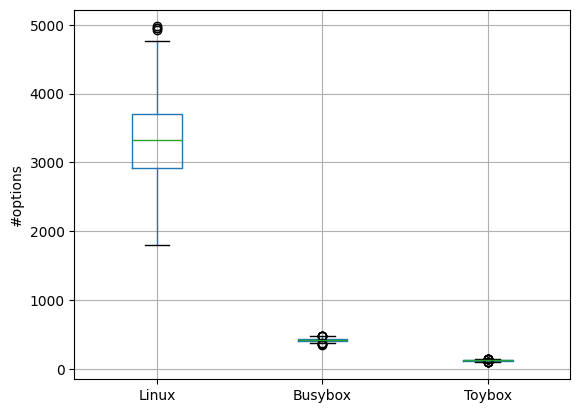

In [3]:
linux_rand_diffs = pandas.concat([diffsize_dir_df(f"linux/configs/rand-{i:02d}").drop(0) for i in range(1, 11)], ignore_index=True)
busybox_rand_diffs = pandas.concat([diffsize_dir_df(f"busybox/configs/rand-{i:02d}").drop(0) for i in range(1, 11)], ignore_index=True)
toybox_rand_diffs = pandas.concat([diffsize_dir_df(f"toybox/configs/rand-{i:02d}").drop(0) for i in range(1, 11)], ignore_index=True)

df_rands_diff = pandas.DataFrame()
df_rands_diff["Linux"] = linux_rand_diffs["diff"]
df_rands_diff["Busybox"] = busybox_rand_diffs["diff"]
df_rands_diff["Toybox"] = toybox_rand_diffs["diff"]

print("Mean:\n", df_rands_diff.mean())
print("Min:\n", df_rands_diff.min())
print("Max:\n", df_rands_diff.max())
df_rands_diff.boxplot()
plt.ylabel('#options')
plt.savefig("all-randconfigs-diff.png", dpi=100, format="png", transparent="True", bbox_inches='tight')
plt.show()

## Experiments on default configurations -- _defconfig_

### Build Time

Mean:
 Linux      23.398872
Busybox    22.018201
Toybox     16.276759
dtype: float64
Min:
 Linux      -9.903498
Busybox     9.525980
Toybox     13.715147
dtype: float64
Max:
 Linux      59.678457
Busybox    47.130300
Toybox     19.817579
dtype: float64


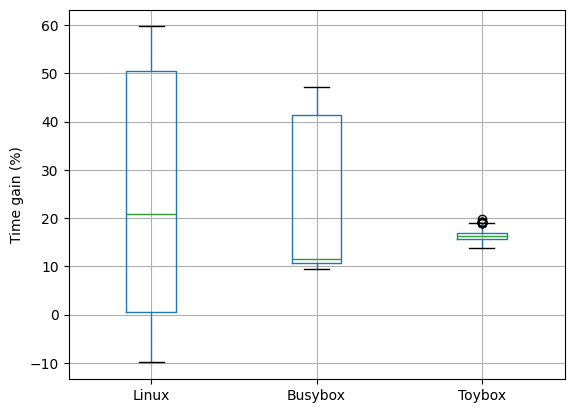

In [4]:
dfg_toybox_list = []
dfg_busybox_list = []
dfg_linux_list = []
config_type = "def"
for j in range(1, 4):
    dfg_toybox_list.append(
        pandas.concat([pandas.read_csv(f"toybox/data/data-{config_type}-{i:02}-run{j}").drop(0) for i in range(1, 11)],
                          ignore_index=True))
    dfg_busybox_list.append(
        pandas.concat([pandas.read_csv(f"busybox/data/data-{config_type}-{i:02}-run{j}").drop(0) for i in range(1, 11)],
                          ignore_index=True))
    dfg_linux_list.append(
        pandas.concat([pandas.read_csv(f"linux/data/data-{config_type}-{i:02}-run{j}").drop(0) for i in range(1, 11)],
                          ignore_index=True))

dfg_toybox_mean = pandas.concat(dfg_toybox_list).groupby(level=0).mean()
dfg_busybox_mean = pandas.concat(dfg_busybox_list).groupby(level=0).mean()
dfg_linux_mean = pandas.concat(dfg_linux_list).groupby(level=0).mean()

dfg_toybox_mean["Gain"] = (dfg_toybox_mean["Clean"] - dfg_toybox_mean["Incremental"])/dfg_toybox_mean["Clean"]*100
dfg_busybox_mean["Gain"] = (dfg_busybox_mean["Clean"] - dfg_busybox_mean["Incremental"])/dfg_busybox_mean["Clean"]*100
dfg_linux_mean["Gain"] = (dfg_linux_mean["Clean"] - dfg_linux_mean["Incremental"])/dfg_linux_mean["Clean"]*100

dfg = pandas.DataFrame()
dfg["Linux"] = dfg_linux_mean["Gain"]
dfg["Busybox"] = dfg_busybox_mean["Gain"]
dfg["Toybox"] = dfg_toybox_mean["Gain"]


print("Mean:\n", dfg.mean())
print("Min:\n", dfg.min())
print("Max:\n", dfg.max())
dfg.boxplot()
plt.ylabel('Time gain (%)')
plt.savefig("all-defconfigs-mean.png", dpi=100, format="png", transparent="True", bbox_inches='tight')
plt.show()

### Diff size comparison

Mean:
 Linux      123.757576
Busybox     29.351515
Toybox      19.144444
dtype: float64
Min:
 Linux       2
Busybox    10
Toybox     10
dtype: int64
Max:
 Linux      640
Busybox    310
Toybox      79
dtype: int64


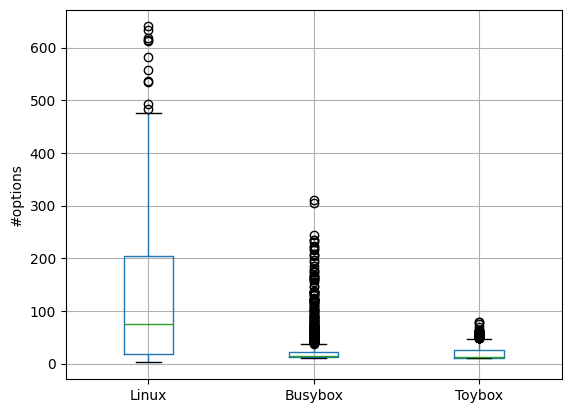

In [5]:
linux_defs_diffs = pandas.concat([diffsize_dir_df(f"linux/configs/def-{i:02d}").drop(0) for i in range(1, 11)], ignore_index=True)
busybox_defs_diffs = pandas.concat([diffsize_dir_df(f"busybox/configs/def-{i:02d}").drop(0) for i in range(1, 11)], ignore_index=True)
toybox_defs_diffs = pandas.concat([diffsize_dir_df(f"toybox/configs/def-{i:02d}").drop(0) for i in range(1, 11)], ignore_index=True)

df_defs_diff = pandas.DataFrame()
df_defs_diff["Linux"] = linux_defs_diffs["diff"]
df_defs_diff["Busybox"] = busybox_defs_diffs["diff"]
df_defs_diff["Toybox"] = toybox_defs_diffs["diff"]

print("Mean:\n", df_defs_diff.mean())
print("Min:\n", df_defs_diff.min())
print("Max:\n", df_defs_diff.max())
df_defs_diff.boxplot()
plt.ylabel('#options')
plt.savefig("diff-defconfigs.png", dpi=100, format="png", transparent="True", bbox_inches='tight')
plt.show()